In [20]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit 

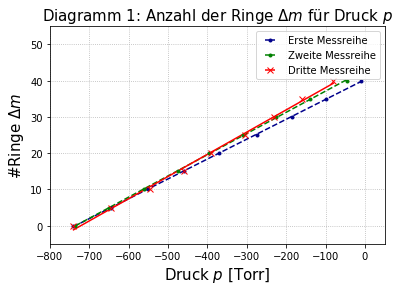

In [22]:
T0=273.15
p0=760 #in Torr, entspricht 101325 Pa
T=23.8+273.15 #Umrechnung in Kelvin
T_err=0.2
a=50e-3 #Innenmaß Küvette
a_err=0.05e-3

del_m=np.array([0,5,10,15,20,25,30,35,40])

p1=-1*np.array([740,645,550,460,370,275,185,100,10])
p1_err=-0.0006*p1

p2=-1*np.array([735,650,560,475,395,310,225,140,45])
p2_err=-0.0006*p2

p3=-1*np.array([740,645,545,460,390,305,230,160,80])
p3_err=-0.0006*p3

def linear(x,a,b):
    return a*x+b

popt1,pcov1=curve_fit(linear,p1,del_m)
popt2,pcov2=curve_fit(linear,p2,del_m)
popt3,pcov3=curve_fit(linear,p3,del_m)

plt.plot(p1,linear(p1,*popt1),color="darkblue",linestyle='--')
plt.plot(p2,linear(p2,*popt2),color="green",linestyle='--')
plt.plot(p3,linear(p3,*popt3),color="red")
plt.errorbar(p1,del_m,xerr=p1_err,marker='.',color="darkblue",linestyle='',label="Erste Messreihe")
plt.errorbar(p2,del_m,xerr=p2_err,marker='.',color="green",linestyle='',label="Zweite Messreihe")
plt.errorbar(p3,del_m,xerr=p3_err,marker='x',color="red",linestyle='',label="Dritte Messreihe")
plt.grid(ls=":")
plt.xlabel("Druck $p$ [Torr]",size=15)
plt.ylabel("#Ringe $\Delta m$",size=15)
plt.xlim(-800,50)
plt.ylim(-5,55)
plt.title("Diagramm 1: Anzahl der Ringe $\Delta m$ für Druck $p$", size=15)
plt.legend(frameon=True)

#Abspeichern des Bildes
#plt.tight_layout()
#plt.savefig('Desktop/V232Diagramm1.pdf', format='PDF')

In [23]:
lam_lit=532e-9 #Wert aus Anleitung
lam_lit_err=1e-9

#Berechung von n0 aus den drei Messreihen
n0_1=lam_lit*p0*T/(2*a*T0)*popt1[0]+1
n0_1_err=(n0_1-1)*np.sqrt((lam_lit_err/lam_lit)**2+(a_err/a)**2+(T_err/T)**2+(pcov1[0,0]**0.5/popt1[0])**2)

n0_2=lam_lit*p0*T/(2*a*T0)*popt2[0]+1
n0_2_err=(n0_2-1)*np.sqrt((lam_lit_err/lam_lit)**2+(a_err/a)**2+(T_err/T)**2+(pcov2[0,0]**0.5/popt2[0])**2)

n0_3=lam_lit*p0*T/(2*a*T0)*popt3[0]+1
n0_3_err=(n0_3-1)*np.sqrt((lam_lit_err/lam_lit)**2+(a_err/a)**2+(T_err/T)**2+(pcov3[0,0]**0.5/popt3[0])**2)

#Berechnung Mittelwert & dessen Fehler
n0=np.array([n0_1,n0_2,n0_3])
n0_err=np.array([n0_1_err,n0_2_err,n0_3_err])
n0_mean=np.mean(n0)
n0_mean_syst=(np.sum(n0_err**2)/len(n0_err))**0.5
n0_mean_std=np.std(n0)/np.sqrt(len(n0))

print("Brechungsindex erste Messung mit Fehler:")
print(str(n0_1) + ' +/- ' + str(n0_1_err))

print("Brechungsindex zweite Messung mit Fehler:")
print(str(n0_2) + ' +/- ' + str(n0_2_err))

print("Brechungsindex dritte Messung mit Fehler:")
print(str(n0_3) + ' +/- ' + str(n0_3_err))

Brechungsindex erste Messung mit Fehler:
1.0002410251830738 +/- 1.3404187223299092e-06
Brechungsindex zweite Messung mit Fehler:
1.0002572411005546 +/- 1.5441789225231906e-06
Brechungsindex dritte Messung mit Fehler:
1.0002694384350785 +/- 5.498806195902462e-06


In [24]:
from scipy.signal import argrelextrema 
from scipy import signal 

#Auslesen der Messdaten 
data = np.genfromtxt (r'Desktop/NewFile0.csv', delimiter = ",",  
                      skip_header =2, skip_footer =0, usecols = (0, 1)) 
x1 = data[0:, 0] 
y1 = data[0:, 1]    
    
#Um 0.02 sehr starkes "Rauschen" der Messwerte, deshalb werden diese Werte beim fitten der Gaußkurve ignoriert. 
mask1 = (y1>-0.002) 
 
y2 = y1[mask1] 
x2 = x1[mask1] 
 
#Bestimmung der lokalen Maxima 
mask2 = argrelextrema(y2, np.greater_equal, order = 1) 
y3 = y2[mask2] 
x3 = x2[mask2] 

#Korrektur der Maxima
dx=np.array([])
i=0
while i < len(x3)-1:
    dx=np.append(dx,x3[i+1]-x3[i])
    i = i+1
    
x_new=np.array([])
y_new=np.array([])
j=0
a=True
while j<len(x3)-1:
    if a:
        temp=np.array([j])
        a=False
    if dx[j-1]<0.001:
        temp=np.append(temp,j)
    else:
        dum=max(y3[temp])
        k=np.argmax(y3[temp])
        x_new=np.append(x_new,x3[temp[k]])
        y_new=np.append(y_new,dum)
        a=True
    j=j+1

Die Halbwertsbreite beträgt:
0.03346368808215484 +/- 0.0007173017632799089 [s]

Die Kohärenzlänge entspricht der Halbwertsbreite, umgerechnet in Längeneinheiten:
3.3463688082154837e-06 +/- 7.17301763279909e-08 [m]


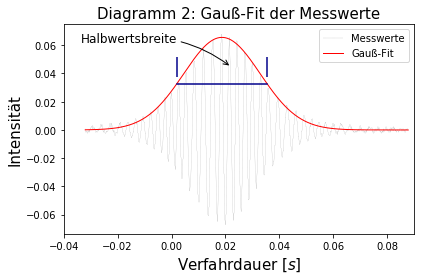

In [25]:
#Fitten der Gaußkurve 
def gaussian(x, mu, sigma, A):  
    return A / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / sigma**2 / 2) 
p = [0.01, 0.01, 0.01] 
popt, pcov = curve_fit(gaussian, x_new, y_new, p0 = p) 
   
#Plotten der Messdaten 
plt.plot(x1, y1, linewidth = 0.1, color = 'k', linestyle = '--') 

#Plotten des Fits 
x = np.linspace(x1[0],x1[-1], 1000) 
plt.plot(x, gaussian(x, *popt), 'r-', linewidth = 1) 
plt.legend(['Messwerte', 'Gauß-Fit'],frameon=True) 
plt.xlabel(r'Verfahrdauer [$s$]',size=15) 
plt.ylabel('Intensität',size=15) 
plt.title('Diagramm 2: Gauß-Fit der Messwerte', size=15) 
plt.xlim(-0.04,0.09)

#Berechnung & Plot der Halbwertsbreite
x_hwb=np.linspace(popt[0]-popt[1]*np.sqrt(2 * np.log(2)),popt[0]+popt[1]*np.sqrt(2 * np.log(2)),100)
y_hwb=0.5*gaussian(popt[0],*popt)*np.ones(100)

plt.plot(x_hwb,y_hwb,color='darkblue') 
plt.annotate(r'Halbwertsbreite',
             xy=(0.022,0.0447876012435), xycoords='data',
             xytext=(-150, 25), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.2"))

#Markierung der Halbwertsbreite
hwb_marker=0.007
plt.errorbar(x_hwb[0],0.0447876012435,yerr=hwb_marker,color='darkblue')
plt.errorbar(x_hwb[-1],0.0447876012435,yerr=hwb_marker,color='darkblue')

#Allgemeine Berechung für die HWB einer Gaußkurve 
halb=2*popt[1]*np.sqrt(2 * np.log(2))
halb_err=2*(pcov[1,1]**0.5)*np.sqrt(2 * np.log(2))
print("Die Halbwertsbreite beträgt:")
print(str(halb) + ' +/- ' + str(halb_err) + ' [s]')

#Umrechnung von Zeit in Länge -> Kohärenzlänge

v_verfahr=0.1e-3 #gemäß Anleitung 

koh=halb*v_verfahr
koh_err=halb_err*v_verfahr

print()
print("Die Kohärenzlänge entspricht der Halbwertsbreite, umgerechnet in Längeneinheiten:")
print(str(koh)+ ' +/- '  + str(koh_err) + ' [m]')

#speichern des Graphen 
plt.tight_layout()
plt.savefig('Desktop/V232Diagramm2.pdf', format='PDF')